In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
def scatter_plot(w, h, X, y, color, label, title, y1_pred=[], y2_pred=[]):
    plt.figure(figsize=(w, h))
    plt.scatter(X, y, color=color, label=label)
    if(len(y1_pred) > 0):
        plt.plot(X, y1_pred, color='red', linewidth=2, label='y1 Predicted line')
    if(len(y2_pred) > 0):
        plt.plot(X, y2_pred, color='green', linewidth=2, label='y2 Predicted line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.show()

def print_perf(title, y, y_pred):
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(title)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

Example dataset:
          X         y
0  0.749080  6.233743
1  1.901429  8.646575
2  1.463988  9.214509
3  1.197317  6.371107
4  0.312037  5.144975


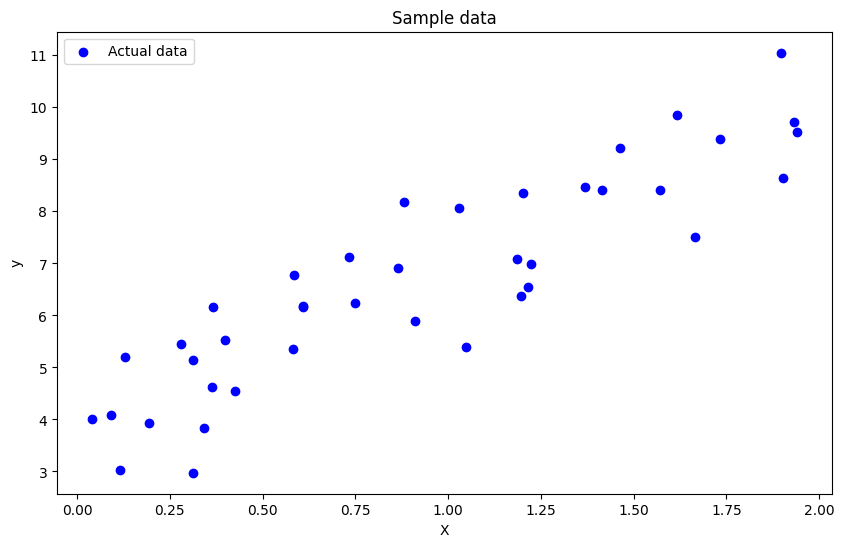

In [26]:
np.random.seed(42)
X = 2 * np.random.rand(40, 1)
E = np.random.randn(40, 1);
y = 4 + 3 * X + E

data = pd.DataFrame(data=np.hstack((X, y)), columns=['X', 'y'])

print("Example dataset:")
print(data.head())

scatter_plot(10, 6, X, y, 'blue', 'Actual data', 'Sample data')


Linear Regression Model Performance:
Mean Squared Error: 2.6823489490027943
R^2 Score: 0.7263638980804032


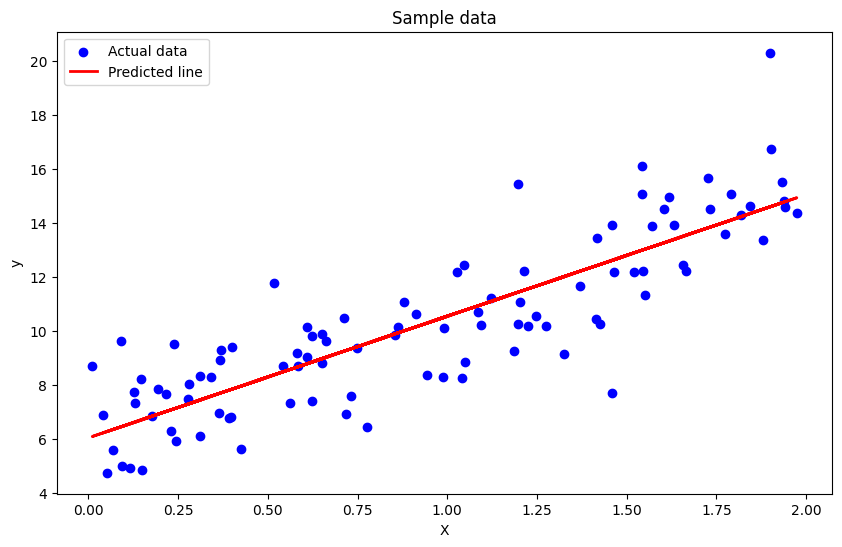

In [83]:
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print_perf("\nLinear Regression Model Performance:", y, y_pred)

scatter_plot(10, 6, X, y, 'blue', 'Actual data', 'Sample data', y_pred)

Example dataset:
          X         y
0 -0.752759 -0.305652
1  2.704286  8.448258
2  1.391964  0.278895
3  0.591951  0.381282
4 -2.063888 -3.561685


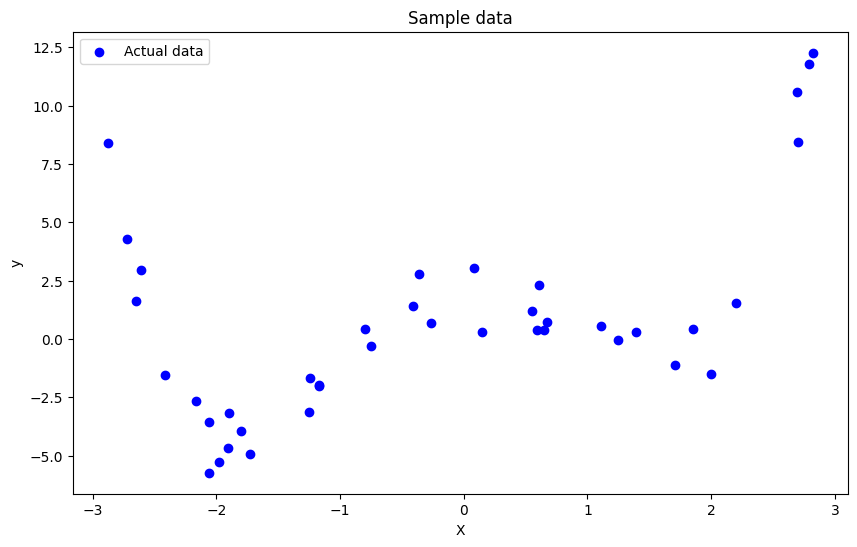

In [93]:
np.random.seed(42)
X = 6 * np.random.rand(40, 1) - 3
E = np.random.randn(40, 1);
y = .5 * X**4 - 3 * X**2 + X + 2 + E

data = pd.DataFrame(data=np.hstack((X, y)), columns=['X', 'y'])

print("Example dataset:")
print(data.head())

scatter_plot(10, 6, X, y, 'blue', 'Actual data', 'Sample data')


Polynomial Regression Model Performance (degree=4):
Mean Squared Error: 0.7588783004322991
R^2 Score: 0.9322302010031491


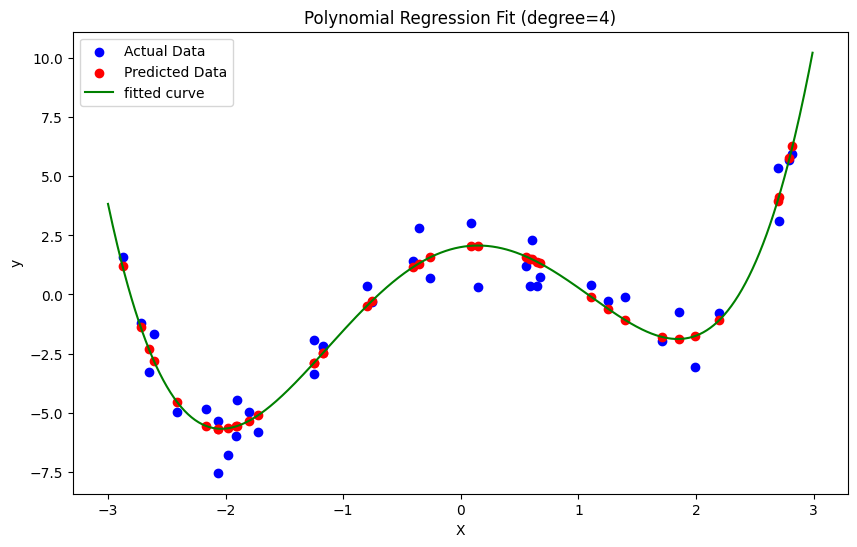

In [73]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

y_pred = model.predict(X_poly)

X_all = np.arange(-3,3,.01).reshape(-1,1)
X_all_poly = poly.transform(X_all)
y_all_pred = model.predict(X_all_poly)

mse_poly = mean_squared_error(y, y_pred)
r2_poly = r2_score(y, y_pred)

print_perf("\nPolynomial Regression Model Performance (degree=4):", y, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X, y_pred, color='red', label='Predicted Data')
plt.plot(X_all, y_all_pred, color='green', label='fitted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (degree=4)')
plt.legend()
plt.show()

In [92]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
E = np.random.randn(100, 1);
y = 4 + 3 * X + np.random.randn(100, 1)

X_poly = np.hstack((X, X**2, X**3))
y = y + .5 * y

data = pd.DataFrame(data=np.hstack((X_poly, y)), columns=['X1', 'X2', 'X3', 'y'])

print("Exmaple data:")
data.head()

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=.5)

ridge_model.fit(X, y)
lasso_model.fit(X, y)

ridge_pred = ridge_model.predict(X)
lasso_pred = lasso_model.predict(X)

print_perf("\nRidge Regression Model Performance:", y, ridge_pred)
print_perf("\nLasso Regression Model Performance:", y, lasso_pred)

Exmaple data:

Ridge Regression Model Performance:
Mean Squared Error: 2.6878289729215794
R^2 Score: 0.7258048610527563

Lasso Regression Model Performance:
Mean Squared Error: 3.395697525690117
R^2 Score: 0.6535926339586418


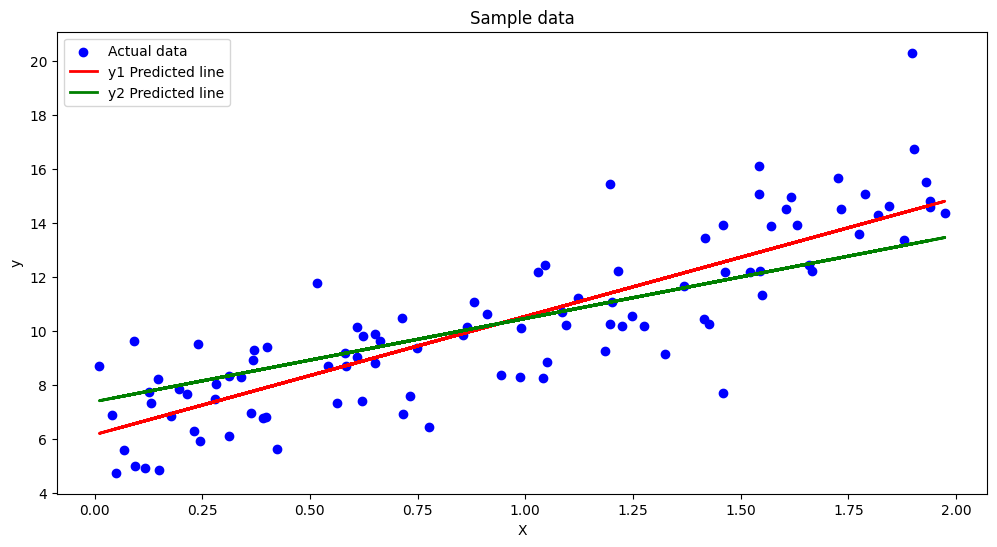

In [91]:
scatter_plot(12, 6, X, y, 'blue', 'Actual data', 'Sample data', y1_pred=ridge_pred, y2_pred=lasso_pred)

Example dataset:
          X         y
0 -0.752759 -0.305652
1  2.704286  8.448258
2  1.391964  0.278895
3  0.591951  0.381282
4 -2.063888 -3.561685


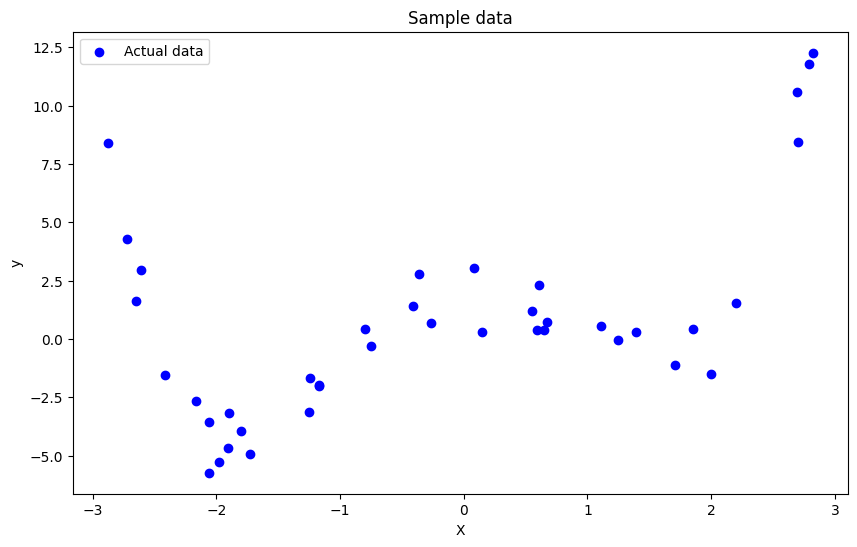

In [94]:
np.random.seed(42)
X = 6 * np.random.rand(40, 1) - 3
E = np.random.randn(40, 1);
y = .5 * X**4 - 3 * X**2 + X + 2 + E

data = pd.DataFrame(data=np.hstack((X, y)), columns=['X', 'y'])

print("Example dataset:")
print(data.head())

scatter_plot(10, 6, X, y, 'blue', 'Actual data', 'Sample data')


Polynomial Regression Model Performance (degree=4):
Mean Squared Error: 0.7923024803597357
R^2 Score: 0.9583097245837257


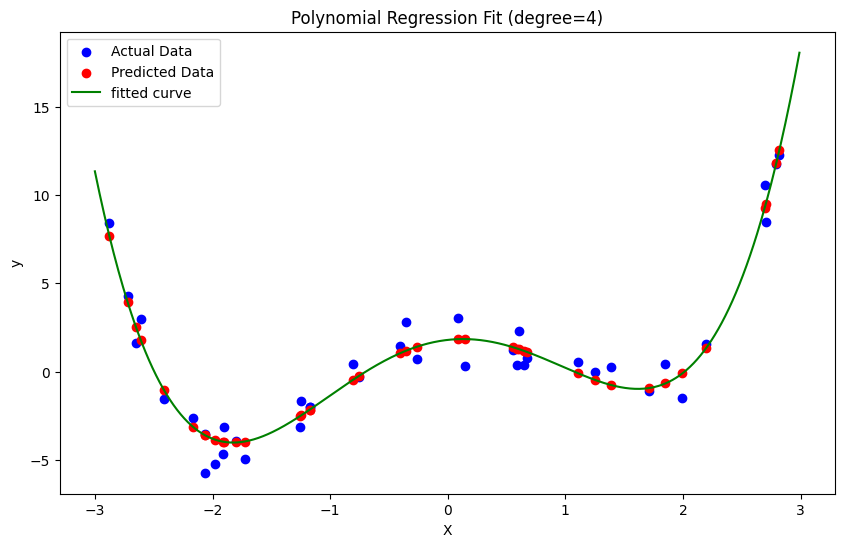

In [112]:
poly_over = PolynomialFeatures(degree=4, include_bias=False)
X_poly_over = poly_over.fit_transform(X)

# model = LinearRegression()
model = Ridge(alpha=1.0)
# model = Lasso(alpha=.1)

model.fit(X_poly_over, y)

y_pred = model.predict(X_poly_over)

X_all = np.arange(-3,3,.01).reshape(-1,1)
X_all_poly = poly_over.transform(X_all)
y_all_pred = model.predict(X_all_poly)

mse_poly = mean_squared_error(y, y_pred)
r2_poly = r2_score(y, y_pred)

print_perf("\nPolynomial Regression Model Performance (degree=4):", y, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X, y_pred, color='red', label='Predicted Data')
plt.plot(X_all, y_all_pred, color='green', label='fitted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (degree=4)')
plt.legend()
plt.show()
